In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [5]:
df.shape

(1014, 7)

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# EDA - DATA CLEANING

In [7]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

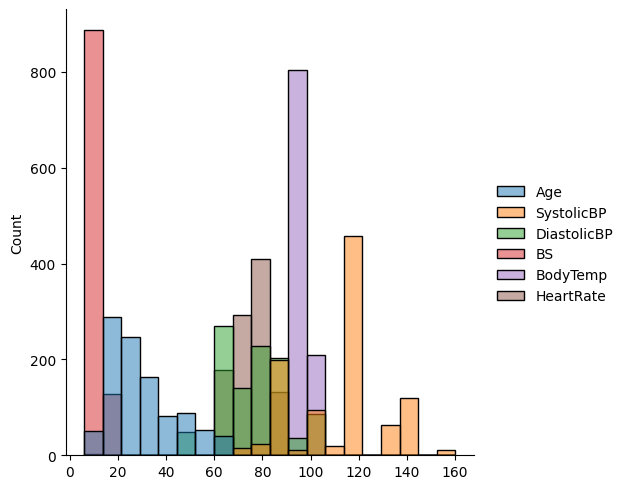

In [8]:
sns.displot(df)

In [9]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

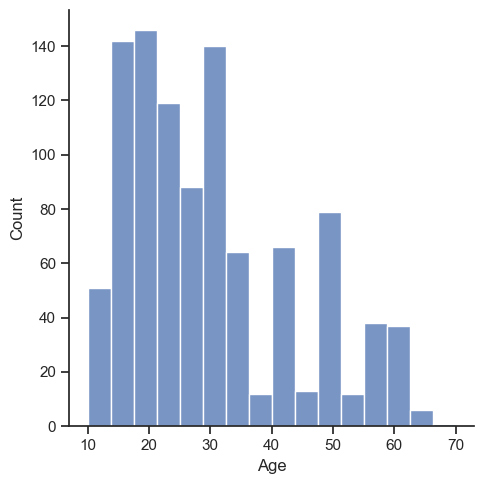

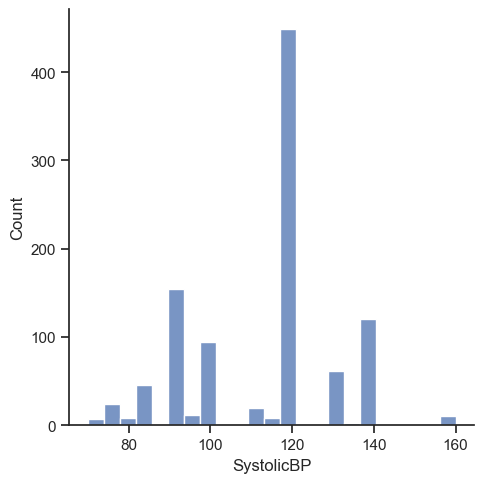

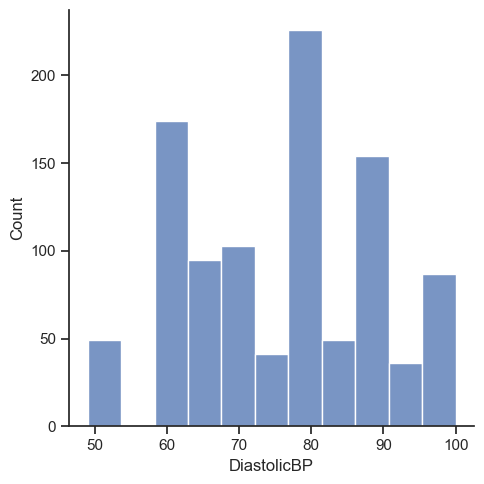

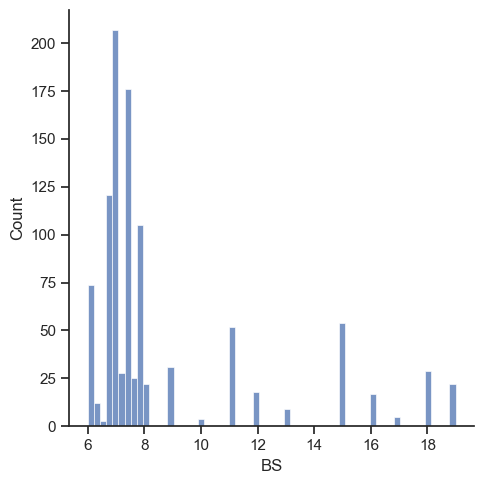

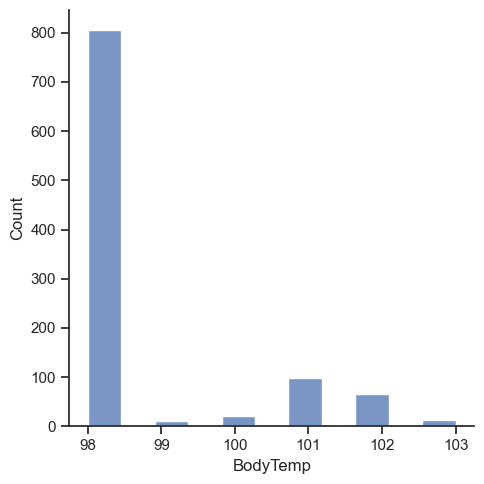

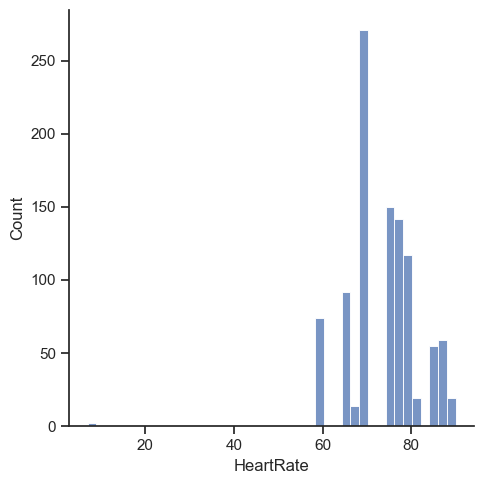

In [13]:
for column in df.columns[:6]:
    sns.displot(df[column])
    plt.show()

<Axes: >

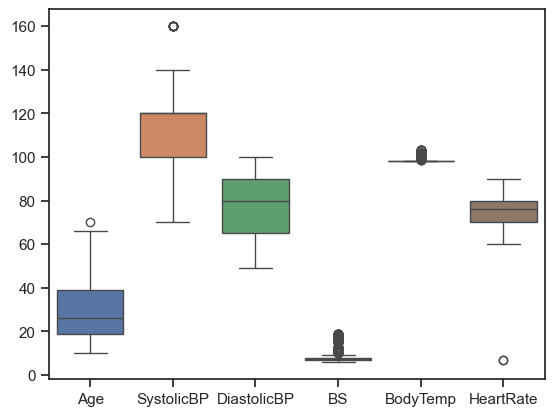

In [14]:
sns.boxplot(data=df)

Z-Score to remove outliers from Age

In [15]:
upperlimit=df["Age"].mean()+1.5*df["Age"].std()
lowerlimit=18
print("upper limit",upperlimit)
print("lower limit", lowerlimit)


upper limit 50.08337317074643
lower limit 18


In [16]:
#remove outliers
new_df=df.loc[(df['Age']<upperlimit)&(df['Age']>=lowerlimit)]
print("Before",len(df))
print("After",len(new_df))
print("Outliers",len(df)-len(new_df))

Before 1014
After 726
Outliers 288


<Axes: ylabel='Age'>

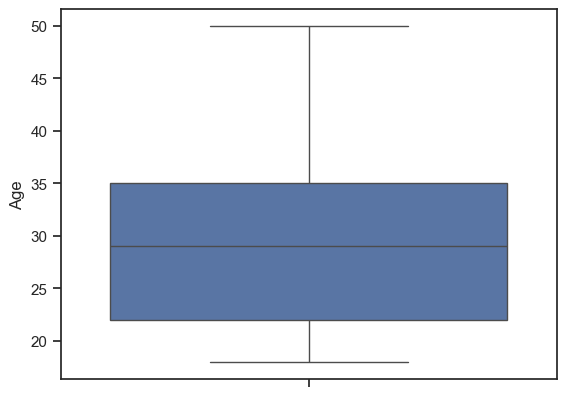

In [78]:
sns.boxplot(data=new_df['Age'])

In [19]:
new_df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,30.217631,117.188705,78.976584,8.750882,98.417906,74.706612
std,9.558070,16.303465,12.917169,3.300208,1.083982,7.639147
min,18.000000,75.000000,50.000000,6.000000,98.000000,60.000000
25%,22.000000,110.000000,70.000000,6.900000,98.000000,70.000000
50%,29.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,50.000000,160.000000,100.000000,19.000000,103.000000,90.000000


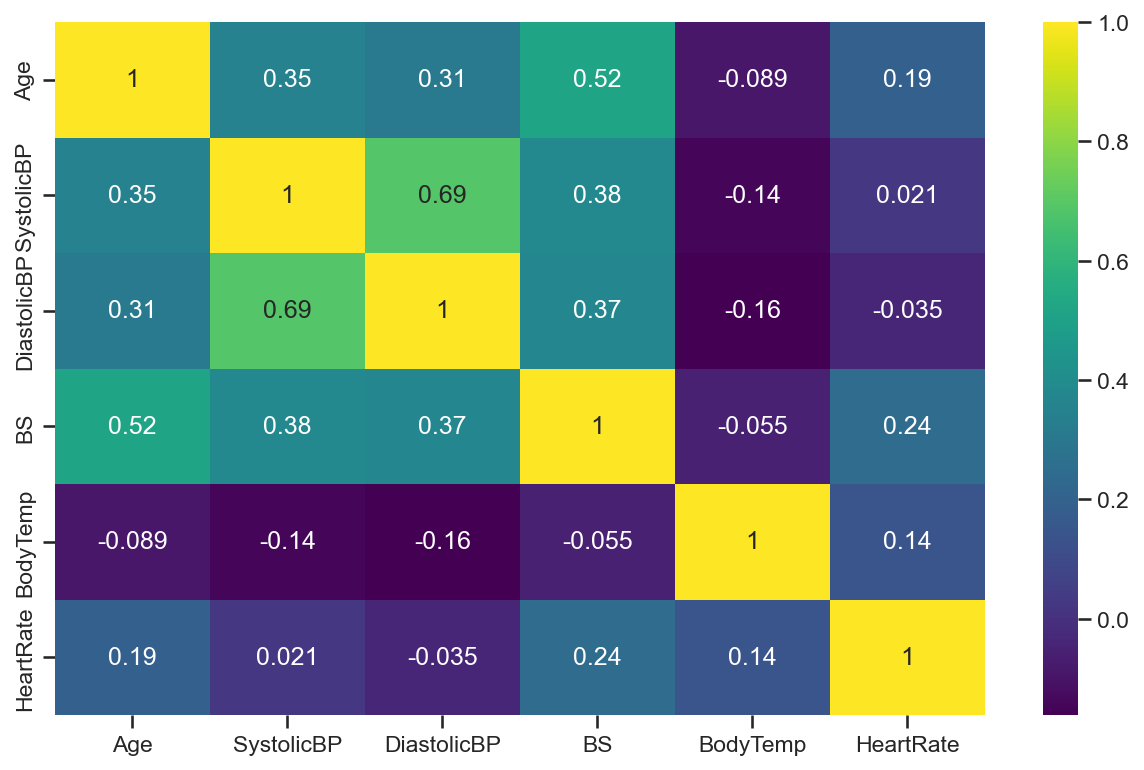

In [31]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(new_df[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']].corr(), cmap='viridis', annot=True)
plt.show()

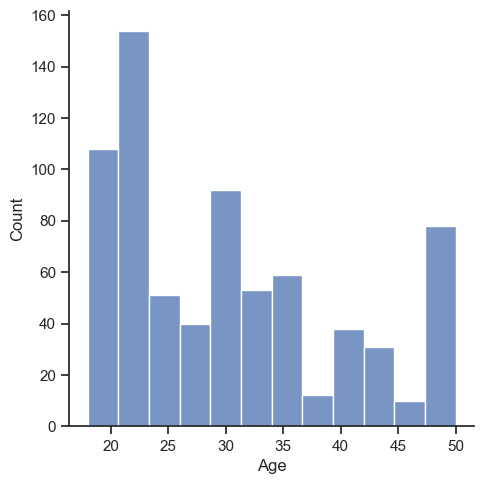

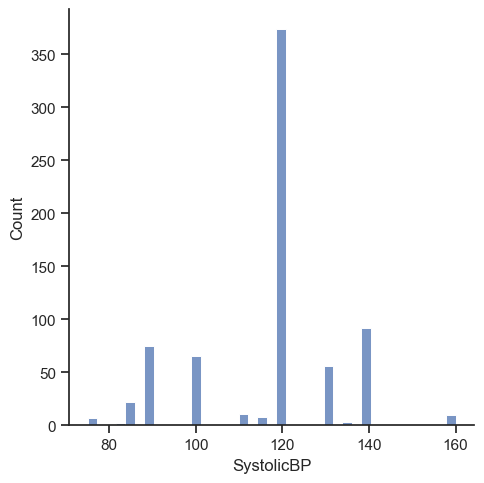

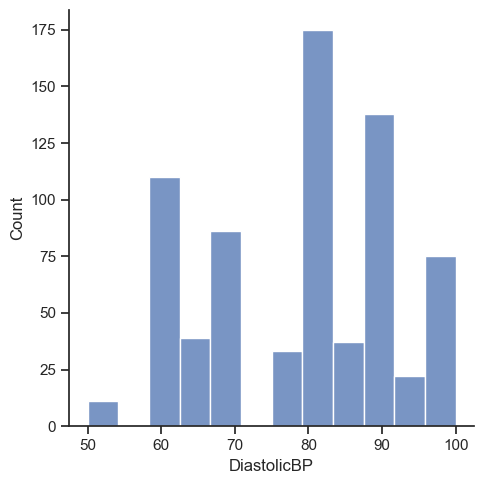

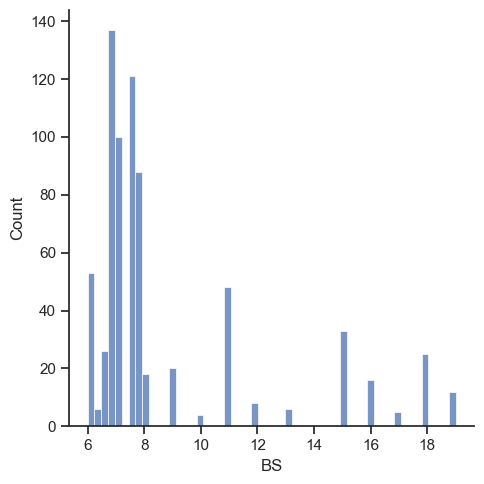

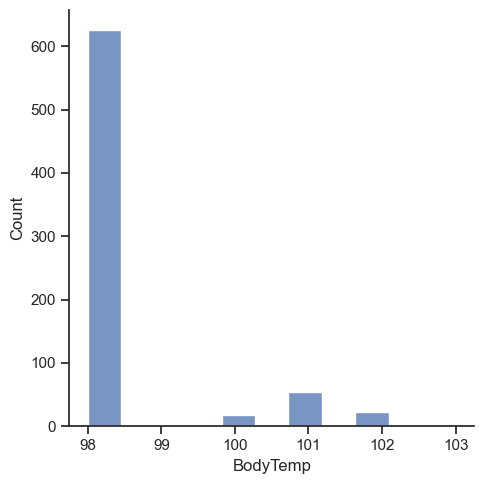

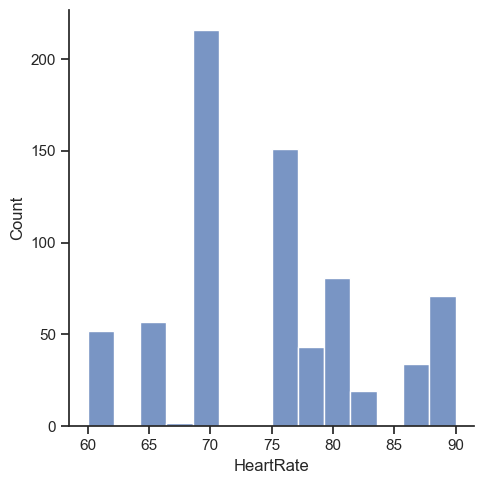

In [33]:
for column in new_df.columns[:6]:
    sns.displot(new_df[column])
    plt.show()

# Model Building


In [34]:
new_df['RiskLevel'].replace({"high risk":"1","mid risk":"0","low risk":"0"}, inplace=True)
new_df['RiskLevel'] = new_df['RiskLevel'].astype(float)
new_df

C:\Users\harsh\AppData\Local\Temp\ipykernel_1480\3687399920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RiskLevel'].replace({"high risk":"1","mid risk":"0","low risk":"0"}, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_1480\3687399920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RiskLevel'] = new_df['RiskLevel'].astype(float)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,1.0
1009,22,120,60,15.0,98.0,80,1.0
1011,35,85,60,19.0,98.0,86,1.0
1012,43,120,90,18.0,98.0,70,1.0


Convert Body Temprature values from Fahrenheit to Celsius and convert the BS (Blood Sugar) from mg/dL (milligrams per deciliter) to mmol/L (millimoles per liter)

In [35]:
new_df.BodyTemp=(new_df.BodyTemp-32)*5/9
new_df.BS=(new_df.BS*18)
new_df

C:\Users\harsh\AppData\Local\Temp\ipykernel_1480\1228070524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.BodyTemp=(new_df.BodyTemp-32)*5/9
C:\Users\harsh\AppData\Local\Temp\ipykernel_1480\1228070524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.BS=(new_df.BS*18)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.0,36.666667,86,1.0
1,35,140,90,234.0,36.666667,70,1.0
2,29,90,70,144.0,37.777778,80,1.0
3,30,140,85,126.0,36.666667,70,1.0
4,35,120,60,109.8,36.666667,76,0.0
...,...,...,...,...,...,...,...
1008,48,120,80,198.0,36.666667,88,1.0
1009,22,120,60,270.0,36.666667,80,1.0
1011,35,85,60,342.0,36.666667,86,1.0
1012,43,120,90,324.0,36.666667,70,1.0


In [40]:
train , test = train_test_split(new_df,test_size=0.15,random_state=35)
print(f"No. of training examples:{train.shape[0]}")
print(f"No. of testing examples:{test.shape[0]}")

No. of training examples:617
No. of testing examples:109


In [41]:
y_test= test['RiskLevel']
x_test= test.drop('RiskLevel', axis=1) #consider all columns except 'RiskLevel'
x_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
103,25,140,100,122.4,36.666667,80
974,33,120,75,180.0,36.666667,70
495,42,120,80,142.2,36.666667,70
217,30,140,100,270.0,36.666667,70
846,36,120,90,126.0,36.666667,82
...,...,...,...,...,...,...
997,35,140,100,162.0,36.666667,66
569,23,120,80,135.0,36.666667,70
692,24,120,80,135.0,36.666667,66
422,36,140,100,122.4,38.888889,76


In [44]:
y_train= train['RiskLevel']
x_train= train.drop('RiskLevel',axis=1) #consider all columns except 'RiskLevel'
x_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
707,32,120,90,124.2,36.666667,70
593,35,140,100,135.0,36.666667,66
150,18,100,70,120.6,36.666667,76
459,32,120,90,122.4,36.666667,70
1009,22,120,60,270.0,36.666667,80
...,...,...,...,...,...,...
346,18,100,70,124.2,36.666667,76
621,32,120,90,135.0,36.666667,70
39,35,100,70,109.8,36.666667,66
378,35,100,70,140.4,36.666667,66


# ALGORITHM

In [58]:
#create instances 
lr=LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [59]:
#Classes dictionary
classes = {
    "LogisticRegression":lr,
    "DecisionTree" : dt,
    "RandomForest" : rf,
}

In [60]:
#Display items in dictionary
classes.items()



dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier())])

In [61]:
#create a function to predict the accuracy and precision
def scores(xtrain,ytrain,xtest,ytest,clf):
    
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    
    return accuracy_score(ytest,clf.predict(xtest)) , precision_score(ytest,clf.predict(xtest))

In [62]:
#Find the scores of each algorithm

precision = []
accuracy = []

for name , cla in classes.items():
    acc , prec = scores(x_train,y_train,x_test,y_test,cla)
    accuracy.append(acc*100)
    precision.append(prec)

In [63]:
#create the dataframe
df_val = pd.DataFrame({"Name":classes.keys(),"Accuracy":accuracy,"Precision":precision}).sort_values("Precision",ascending=False)
df_val

,Name,Accuracy,Precision
2,RandomForest,94.495413,0.866667
0,LogisticRegression,88.990826,0.833333
1,DecisionTree,92.660550,0.812500


C:\Users\harsh\AppData\Local\Temp\ipykernel_1480\1811039448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name',y='Accuracy', data=df_val,palette=['lightpink','lightgreen','lightblue'])


<Axes: xlabel='Name', ylabel='Accuracy'>

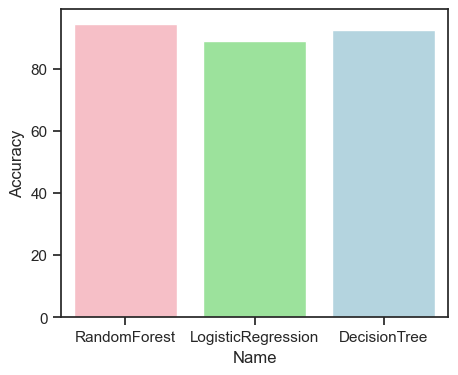

In [ ]:
plt.figure(figsize=(5,4))

sns.barplot(x='Name',y='Accuracy', data=df_val,palette=['lightpink','lightgreen','lightblue'])

Based on Accuracy and Precision Randon Forest is the best

# RANDOM FOREST

In [ ]:
from sklearn import metrics
random_model=RandomForestClassifier(n_estimators=50)
random_model.fit(x_train,y_train)
random_predict=random_model.predict(x_test)
print("Accuracy=",metrics.accuracy_score(y_test,random_predict))
random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)


Accuracy= 0.944954128440367
      Id  Predicted Risk  Actual Risk
103  103             1.0          1.0
974  974             1.0          1.0
495  495             0.0          0.0
217  217             1.0          1.0
846  846             0.0          0.0
..   ...             ...          ...
997  997             1.0          1.0
569  569             0.0          0.0
692  692             0.0          0.0
422  422             1.0          1.0
397  397             1.0          1.0

[109 rows x 3 columns]


In [ ]:
cm=confusion_matrix(y_test,random_predict)
cm

array([[77,  4],
       [ 2, 26]], dtype=int64)

In [79]:
import numpy as np

def predict_risk(Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate):
    x=np.array([Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate])
    prediction=random_model.predict(x.reshape(1,-1))
    if prediction:
        return "High Risk"
    else:
        return "Low risk"


In [80]:
predict_risk(37, 125, 70, 270, 36,72)

c:\Users\harsh\anaconda3\envs\Edujournal\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'High Risk'

Building web-based interfaces to interact with machine learning models for testing and demonstrating model

In [87]:
import gradio as gr
app = gr.Interface(css=".gradio-container {background-color: #ffffff}",fn=predict_risk, inputs=['number','number','number','number','number','number'], outputs='text',title="mAI-Care")
app.launch(debug=True, share= True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


c:\Users\harsh\anaconda3\envs\Edujournal\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
